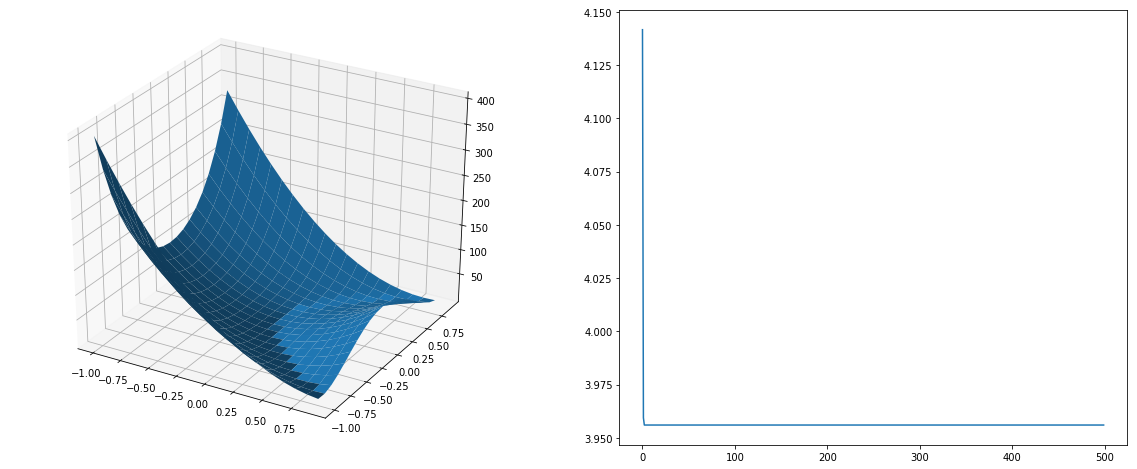

In [43]:
def fun(x):
    result=100*(x[0,0]**2-x[1,0])**2+(x[0,0]-1)**2
    return result
def gfun(x):
    result=zeros((2,1))
    result[0,0]=400*(x[0,0]**2-x[1,0])*x[0,0]+2*(x[0,0]-1)
    result[1,0]=-200*(x[0,0]**2-x[1,0])
    return result
##
from numpy import *
##x0为列
def BFGS(fun,gfun,x0):
    result=[]
    iter=0
    max_iter=500
    rho=0.55
    sigma=0.4
    num_dim=shape(x0)[0]
    Bk=eye(num_dim)
    while(iter<max_iter):
        gk=mat(gfun(x0))
        pk=-mat(linalg.solve(Bk,gk))#使用矩阵乘法
        m=0
        mk=0
        while(m<20):
            newf=fun(x0+rho**m*pk)
            oldf=fun(x0)
            if(newf<oldf+sigma*rho**m*gk.T*pk):
                mk=m
                break
            m=m+1
            
        #DFP校正
        x=x0+rho**m*pk
        sk=x-x0
        yk=gfun(x)-gk #误差
        if(sk.T*yk>0):
            Bk=Bk+(yk*yk.T)/(yk.T*sk)-(Bk*yk*yk.T*Bk)/(sk.T*Bk*sk)
        iter=iter+1
        x0=x
        result.append(fun(x0))
    return result 
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
x0=mat([[-1.2],[1]])
result1=BFGS(fun,gfun,x0)
n=len(result1)
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121,projection='3d')
ax2=fig.add_subplot(122)
ax2.plot(arange(0,n,1),result1)
x1=arange(-1,1,0.1)
x2=arange(-1,1,0.1)
Z=zeros((len(x1),len(x2)))
for i in arange(0,len(x1),1):
    for j in arange(0,len(x2),1):
        x=mat([[x1[i]],[x2[j]]])
        Z[i,j]=fun(x)

[X,Y]=meshgrid(x1,x2)
ax1.plot_surface(X,Y,Z)

In [7]:
Bk=mat([[1,2],[3,4]])
gk=mat([1,2]).T
pk=mat(linalg.solve(Bk,gk))
print(pk)

[[0. ]
 [0.5]]


TypeError: 'numpy.ndarray' object is not callable